In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C:/Users/prata/OneDrive/Desktop/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# TO find missing values

In [6]:
missing_values=df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# To fill missing values

In [8]:
# Replacing missing values in "Age" with mean value.

In [9]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [10]:
# Replacing missing values in embarked column there is no interger value so cannot go for mean, hence we use mode.

In [11]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [12]:
# If need drop variable
# Drop 'cabin' column due to high percentage of missing values.

In [13]:
df=df.drop(columns=['Cabin'])

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
cols = ['Sex', 'Embarked']
l= LabelEncoder()

for col in cols:
    df[col] = l.fit_transform(df[col])

In [17]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
# Visualisation

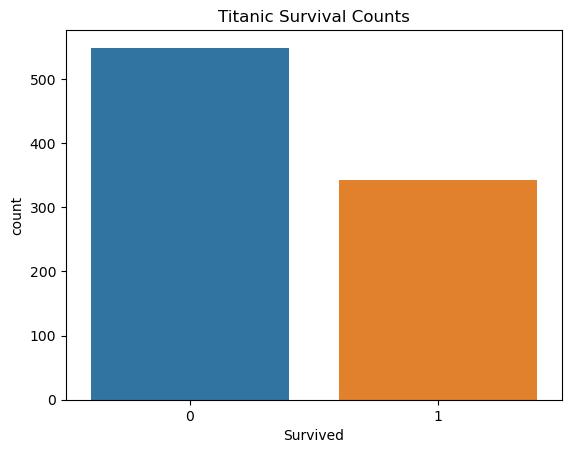

In [19]:
# Bar plot
sns.countplot(x='Survived', data=df)
plt.title('Titanic Survival Counts')
plt.show()

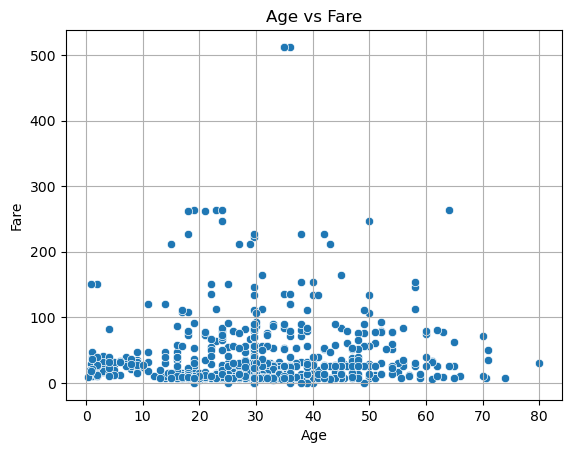

In [20]:
# Scatter plot
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()
plt.show()

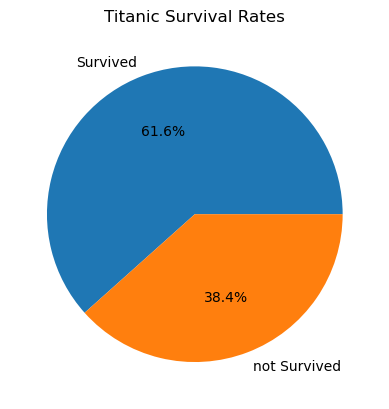

In [21]:
# Pie charts
labels = ['Survived', 'not Survived']
size=df['Survived'].value_counts()
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Titanic Survival Rates')
plt.show()

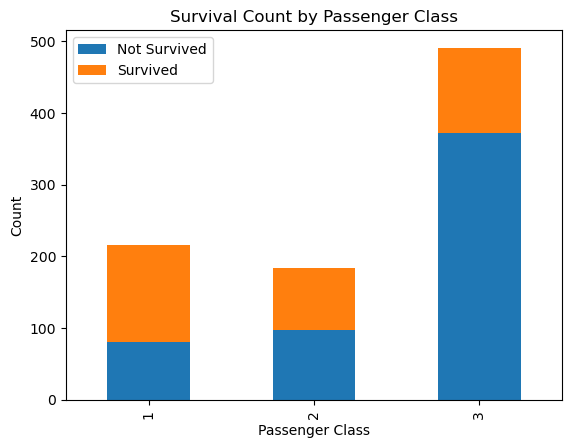

In [22]:
JB = df.groupby(['Pclass', 'Survived']).size().unstack()
JB.plot(kind='bar', stacked=True)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [23]:
# choose dependent & Independent variable.

In [24]:
# Drop unnecessary columns.

In [25]:
df=df.drop(columns=['Name','Ticket','PassengerId'],axis=0)

In [26]:
X=df.drop(columns=['Survived']) # Independent Variable 

In [27]:
Y=df['Survived']   # Dependent Variable

In [28]:
# Split data into train test 80:20

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [31]:
# Naive bayes algorithms

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
model = GaussianNB()

In [34]:
model.fit(X_train, Y_train)

GaussianNB()

In [35]:
# Predict data using fitted model

In [36]:
Y_predict = model.predict(X_test)

In [37]:
# Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score

In [39]:
accuracy=accuracy_score(Y_test,Y_predict)
print(accuracy)

0.7877094972067039


In [40]:
c_report=classification_report(Y_test,Y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       110
           1       0.70      0.78      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



In [41]:
conf_matrix=confusion_matrix(Y_test,Y_predict)
print(conf_matrix)

[[87 23]
 [15 54]]


In [44]:
precision=precision_score(Y_test,Y_predict)
print(precision)

0.7012987012987013


In [45]:
recall=recall_score(Y_test,Y_predict)
print(recall)

0.782608695652174


In [46]:
# knn algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
k=5
model1=KNeighborsClassifier(n_neighbors=k)

In [49]:
model1.fit(X_train, Y_train)

KNeighborsClassifier()

In [50]:
Y1_predict = model1.predict(X_test)

In [51]:
accuracy=accuracy_score(Y_test,Y1_predict)
print(accuracy)

0.7430167597765364


In [52]:
c_report=classification_report(Y_test,Y1_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       110
           1       0.71      0.57      0.63        69

    accuracy                           0.74       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.74      0.74      0.74       179



In [53]:
conf_matrix=confusion_matrix(Y_test,Y1_predict)
print(conf_matrix)

[[94 16]
 [30 39]]


In [55]:
precision=precision_score(Y_test,Y1_predict)
print(precision)

0.7090909090909091


In [56]:
recall=recall_score(Y_test,Y1_predict)
print(recall)

0.5652173913043478


In [57]:
# Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model2=DecisionTreeClassifier(random_state=0)

In [70]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [71]:
Y2_predict=model2.predict(X_test)

In [72]:
accuracy=accuracy_score(Y_test,Y2_predict)
print(accuracy)

0.7877094972067039


In [73]:
c_report=classification_report(Y_test,Y2_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [74]:
conf_matrix=confusion_matrix(Y_test,Y2_predict)
print(conf_matrix)

[[94 16]
 [22 47]]


In [75]:
precision=precision_score(Y_test,Y2_predict)
print(precision)

0.746031746031746


In [76]:
recall=recall_score(Y_test,Y2_predict)
print(recall)

0.6811594202898551


In [77]:
# Comparision

In [79]:
models={'Naive Bayes':GaussianNB(),'k-Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),'Decision Tree':DecisionTreeClassifier(random_state=0)}

In [84]:
Res=[]
for model_name,model in models.items():
    model.fit(X_train,Y_train)
    predict_Y=model.predict(X_test)
    accuracy=accuracy_score(Y_test,predict_Y)
    precision=precision_score(Y_test,predict_Y)
    recall=recall_score(Y_test,predict_Y)
    Res.append({"Model":model_name,"Accuracy": accuracy,"Precision":precision,"Recall":recall})

In [85]:
import pandas as pd
Result=pd.DataFrame(Res)
print(Result)

                 Model  Accuracy  Precision    Recall
0          Naive Bayes  0.787709   0.701299  0.782609
1  k-Nearest Neighbors  0.743017   0.709091  0.565217
2        Decision Tree  0.787709   0.746032  0.681159
